Import pandas library

In [ ]:
from pandas import read_csv

For uploading the data from the local storage

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Energy Meter.csv to Energy Meter.csv


In [ ]:
fileName = "Energy Meter.csv"
names = ['Voltage','Current','Power','class']
dataset = read_csv(fileName, names=names)

# Summarizing the dataset

* print(dataset.shape) = is going to give the number of column and rows for the data
* print(dataset.head(20)) = is going to print the first 20 rows of the data
* print(dataset.describe()) = describe is going to give the detailed values of each of the column. Like mean, median, max, min etc.
* print(dataset.groupby('class').size) = this going to give the number of data which each category of the class have(refer the example for clearance)

In [ ]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby('class').size())

(400, 4)
    Voltage  Current  Power   class
0    0.0000      0.0    0.0  NoLoad
1    0.0000      0.0    0.0  NoLoad
2    0.0000      0.0    0.0  NoLoad
3    0.0000      0.0    0.0  NoLoad
4    0.0000      0.0    0.0  NoLoad
5    0.0000      0.0    0.0  NoLoad
6    0.0000      0.0    0.0  NoLoad
7    0.3833      0.0    0.0  NoLoad
8    0.0000      0.0    0.0  NoLoad
9    0.0000      0.0    0.0  NoLoad
10   0.0000      0.0    0.0  NoLoad
11   0.0000      0.0    0.0  NoLoad
12   0.0000      0.0    0.0  NoLoad
13   0.0000      0.0    0.0  NoLoad
14   0.0000      0.0    0.0  NoLoad
15   0.0000      0.0    0.0  NoLoad
16   0.0000      0.0    0.0  NoLoad
17   0.0000      0.0    0.0  NoLoad
18   0.0000      0.0    0.0  NoLoad
19   0.0000      0.0    0.0  NoLoad
          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.07

# Visualizing the dataset

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

* dataset.hist() = selesting the histogram dataset for visualization(we can use any graph for representation for this data that is available in the pyplot)
* pyplot.title('HISTOGRAM PLOT') = Giving the name for the graph
* pyplot.show() = calling the function to view the data

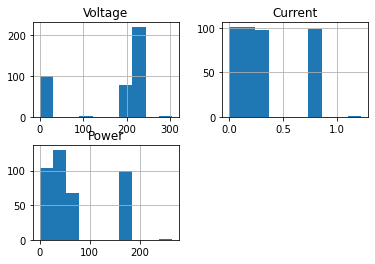

In [ ]:
dataset.hist()
pyplot.title('HISTOGRAM PLOT')
pyplot.show()

# Evaluating every Machine Learning Algorithm

In [ ]:
# 6 ML Algo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state=1,shuffle = True)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.993750 (0.018750)
NB: 0.990625 (0.020010)
SVM: 0.990625 (0.020010)


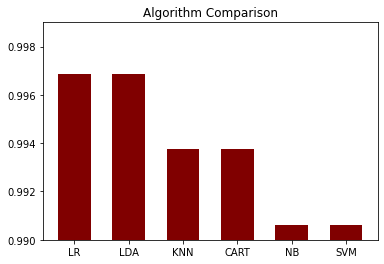

In [ ]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.990, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()
